In [1]:
import sys
sys.path.append("../../XLEMOO")

In [2]:
from XLEMOO.LEMOO import EAParams, MLParams, LEMParams, LEMOO
from XLEMOO.fitness_indicators import naive_sum, must_sum_to_one, asf_wrapper, single_objective
from XLEMOO.tree_interpreter import instantiate_tree_rules, find_all_paths
from XLEMOO.problems import river_pollution_problem
from desdeo_emo.recombination import SBX_xover, BP_mutation
from desdeo_emo.selection import TournamentSelection
from desdeo_problem.testproblems import test_problem_builder
from desdeo_tools.scalarization.ASF import SimpleASF, GuessASF, StomASF, PointMethodASF
from desdeo_tools.utilities import hypervolume_indicator, epsilon_indicator_ndims, fast_non_dominated_sort_indices

from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import matplotlib.pyplot as plt
import numpy as np
from imodels import C45TreeClassifier

In [3]:
def plot_mean_fitness(population, fitness_fun):
    fitness = np.squeeze([fitness_fun(p) for p in population])
    means = np.mean(fitness, axis=1)
    plt.plot(np.arange(means.shape[0]), means)
    
def plot_std_fitness(population, fitness_fun):
    fitness = np.squeeze([fitness_fun(p) for p in population])
    stds = np.std(fitness, axis=1)
    plt.plot(np.arange(stds.shape[0]), stds)
    
def plot_best_fitness(population, fitness_fun):
    fitness = np.squeeze([fitness_fun(p) for p in population])
    mins = np.min(fitness, axis=1)
    plt.plot(np.arange(mins.shape[0]), mins)

## Define problem

In [528]:
n_objectives = 4
n_variables = 5
problem = test_problem_builder("DTLZ2", n_variables, n_objectives)
# problem = river_pollution_problem()

## Setting model parameters

In [569]:
nadir = np.ones(n_objectives)
ideal = np.zeros(n_objectives)
ref_point = ideal
fitness_fun = asf_wrapper(GuessASF(nadir), {"reference_point": ref_point})

# fitness_fun = naive_sum

lem_params = LEMParams(
    n_total_iterations=10,
    n_ea_gen_per_iter=25,
    n_ml_gen_per_iter=1,
    use_ea=True,
    use_ml=True,
    fitness_indicator=fitness_fun,
    past_gens_to_consider=10
)

ea_params = EAParams(
    population_size=32,
    cross_over_op=SBX_xover(),
    mutation_op=BP_mutation(problem.get_variable_lower_bounds(), problem.get_variable_upper_bounds()),
    selection_op=TournamentSelection(None, tournament_size=4),
    population_init_design="LHSDesign"
)

# ml = DecisionTreeClassifier(random_state=0)
ml = DecisionTreeClassifier()
ml_params = MLParams(
    H_split=0.2,
    L_split=0.2,
    ml_model=ml,
    ml_fitness=fitness_fun
)

## Setup LEMOO model

In [570]:
lemoo = LEMOO(problem, lem_params, ea_params, ml_params)

In [571]:
lemoo.reset_population()
history = lemoo.run()[3:]

starting learning mode
Cherry pick results: EA: 32; ML: 0.
starting learning mode
Cherry pick results: EA: 32; ML: 0.
starting learning mode
Cherry pick results: EA: 32; ML: 0.
starting learning mode
Cherry pick results: EA: 32; ML: 0.
starting learning mode
Cherry pick results: EA: 31; ML: 1.
starting learning mode
Cherry pick results: EA: 32; ML: 0.
starting learning mode
Cherry pick results: EA: 31; ML: 1.
starting learning mode
Cherry pick results: EA: 32; ML: 0.
starting learning mode
Cherry pick results: EA: 30; ML: 2.
starting learning mode
Cherry pick results: EA: 31; ML: 1.


In [572]:
objectives = np.array([p.objectives for p in history])

[0. 0. 0. 0.]


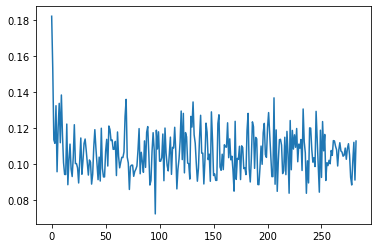

In [573]:
def plot_hypervolume(population, ref_point):
    objectives = np.array([p.problem.evaluate(p.individuals).objectives for p in population])
    hvs = np.array([hypervolume_indicator(objs, nadir) for objs in objectives])
    plt.plot(np.arange(hvs.shape[0]), hvs)
                       
plot_hypervolume(history, ref_point)
print(ref_point)

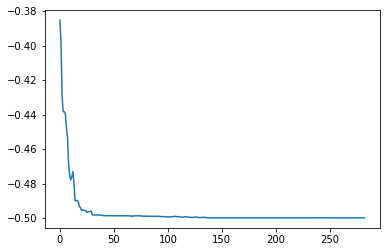

In [574]:
plot_best_fitness(history, fitness_fun)

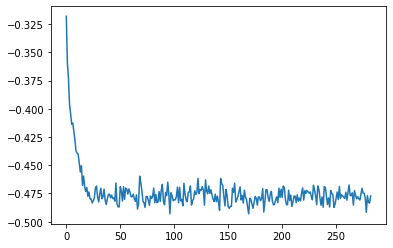

In [575]:
plot_mean_fitness(history, fitness_fun)

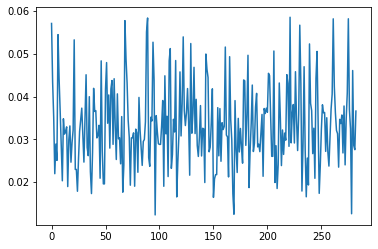

In [576]:
plot_std_fitness(history, fitness_fun)

{'rules': [[1, 'lte', 0.4774428904056549], [1, 'lte', 0.4769752025604248]], 'samples': 74.0, 'impurity': 0.0, 'classification': -1}
{'rules': [[1, 'lte', 0.4774428904056549], [1, 'gt', 0.4769752025604248], [0, 'lte', 0.6892009675502777], [0, 'lte', 0.6494103968143463]], 'samples': 7.0, 'impurity': 0.0, 'classification': -1}
{'rules': [[1, 'lte', 0.4774428904056549], [1, 'gt', 0.4769752025604248], [0, 'lte', 0.6892009675502777], [0, 'gt', 0.6494103968143463]], 'samples': 25.0, 'impurity': 0.0, 'classification': 1}
{'rules': [[1, 'lte', 0.4774428904056549], [1, 'gt', 0.4769752025604248], [0, 'gt', 0.6892009675502777]], 'samples': 11.0, 'impurity': 0.0, 'classification': -1}
{'rules': [[1, 'gt', 0.4774428904056549]], 'samples': 108.0, 'impurity': 0.0, 'classification': -1}


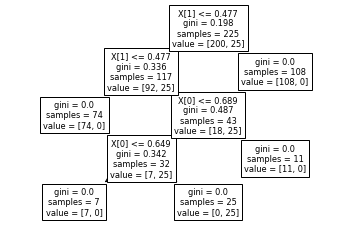

In [519]:
tree.plot_tree(lemoo.current_ml_model);
paths = find_all_paths(lemoo.current_ml_model)
for p in paths:
    print(p)

In [393]:
print(history[-1].individuals)

[[0.53782727 0.4731098 ]
 [0.56095438 0.48576294]
 [0.63331536 0.56107542]
 [0.54977856 0.47244979]
 [0.77263067 0.48583337]
 [0.68885457 0.48583337]
 [0.54176846 0.41190132]
 [0.67046536 0.46868979]
 [0.63256028 0.44330634]
 [0.58431531 0.48583337]
 [0.63024731 0.47950618]
 [0.72656453 0.48583337]
 [0.70369431 0.47185071]
 [0.75317314 0.48583337]
 [0.82716236 0.5130316 ]
 [0.53173981 0.52981657]
 [0.59281561 0.48583337]
 [0.69580942 0.48583337]
 [0.58221161 0.48583337]
 [0.61523392 0.48094701]
 [0.52105022 0.48583337]
 [0.5101771  0.62008641]
 [0.6030224  0.49449576]
 [0.75525746 0.48583337]
 [0.76829109 0.48583337]
 [0.57212882 0.46589296]
 [0.60752393 0.48583337]
 [0.74868631 0.45234703]
 [0.60471101 0.48583337]
 [0.65741047 0.48583337]
 [0.49272991 0.48583337]
 [0.6075961  0.47606093]
 [0.77933311 0.48583337]
 [0.62224377 0.48583337]
 [0.55488605 0.48583337]
 [0.6614191  0.55445066]
 [0.69806081 0.48778906]
 [0.5606464  0.48583337]
 [0.66963873 0.48583337]
 [0.60585896 0.37319774]
